In [1]:
from jax import jit
import jax.numpy as jnp

from glworia.amp.lens_model import LensModel
from glworia.amp.amplification_factor import (amplification_computation_prep, 
                                          crtical_curve_interpolants,
                                          compute_F)
from glworia.amp.root import make_crit_curve_helper_func
import matplotlib.pyplot as plt

I0000 00:00:1706818445.491190  827101 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [2]:
class PlummerLens(LensModel):

    def __init__(self):
        pass

    def get_Psi(self):
        @jit
        def Psi_Plummer(x, lens_params):
            kappa = lens_params[0]
            return kappa / 2 * jnp.log(1 + jnp.linalg.norm(x)**2)
        return Psi_Plummer

In [3]:
lm = PlummerLens()
Psi_Plummer = lm.get_Psi()
T_funcs, helper_funcs = amplification_computation_prep(Psi_Plummer)
crit_curve_helper_funcs = make_crit_curve_helper_func(T_funcs)

In [4]:
param_arr = jnp.linspace(0.1, 10., 100000)
crit_funcs = crtical_curve_interpolants(param_arr, T_funcs, crit_curve_helper_funcs)

In [5]:
ws = jnp.linspace(1e-2, 1e3, 10**6)
y = jnp.array([0.1, 0.])
lens_params = jnp.array([5.])

N = 200
T0_max = 1000.

F_interp, _, _, _ = compute_F(ws, y, lens_params, T_funcs, helper_funcs, crit_funcs,
              N, T0_max)

Text(0, 0.5, '$|F|$')

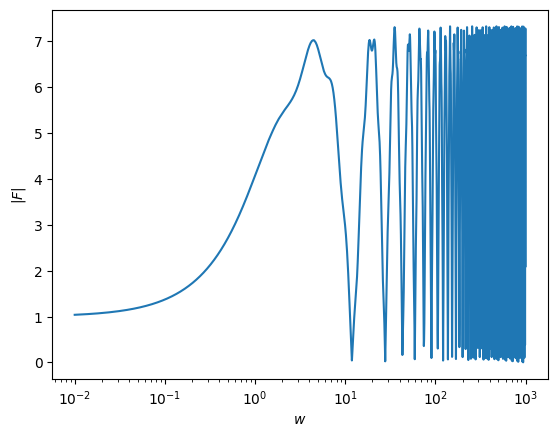

In [6]:
fig, ax = plt.subplots()
ax.semilogx(ws, jnp.abs(F_interp))
ax.set_xlabel(r'$w$')
ax.set_ylabel(r'$|F|$')